#### Tugas 1: Multiple Linear Regression

In [102]:
import numpy as np
import pandas as pd

Melakukan load data csv, dan menampilkan data. Melihat apakah ada data yang kosong atau tidak.

In [114]:
data = pd.read_csv('insurance.csv')

# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
Jawab:
Variable bebas (fitur)
- Age / umur : Menurut saya umur termasuk variable bebas yang dapat mempengaruhi variable target (biaya medis personal). Karena semakin bertambahnya usia maka resiko penyakit semakin tinggi, sehingga biaya asuransi juga akan meningkat.
- BMI / Body Mass Index : Menurut saya BMI termasuk variable bebas yang dapat mempengaruhi variable target (biaya medis personal). Karena semakin tinggi BMI / obesitas, maka akan meningkatkan resiko penyakit sehingga akan semakin tinggi biaya asuransi.
- Smoker / perokok : Menurut saya smoker termasuk variable bebas yang dapat mempengaruhi variable target (biaya medis personal). Karena perokok memiliki resiko yang lebih tinggi terutama terhadap penyakit paru-paru dan kanker, sehingga biaya asuransi akan lebih tinggi.

Variable Target
- Charges / biaya : Menurut saya variable charges merupakan variable target. Karena besar / kecilnya variable ini dipengaruhi oleh variable bebas.

c:\Users\bag4s\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


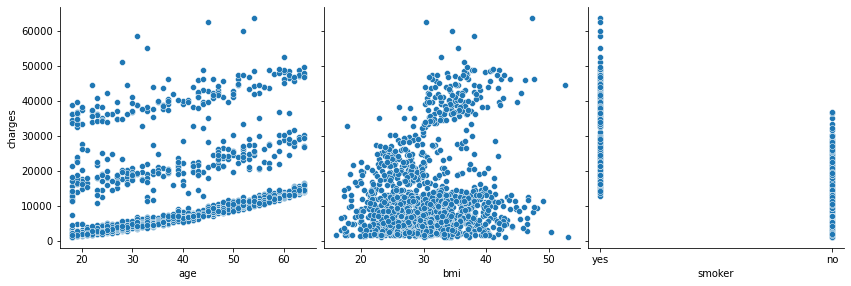

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'smoker'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

##### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
Melakukan pembagian antara data training dan data testing dengan proporsi 8 : 2

In [123]:
from sklearn.model_selection import train_test_split

x = data[["age", "bmi", "smoker"]]
y = data["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

181     1631.82120
104     5003.85300
802     2103.08000
393     9290.13950
150     5125.21570
          ...     
640     6666.24300
839    12622.17950
189     4922.91590
264    20462.99766
904    12644.58900
Name: charges, Length: 936, dtype: float64

##### 3. Lakukan feature scaling jika diperlukan.

melakukan encoding pada kolom "smoker" menjadi numerik, agar dapat dilakukan perhitungan

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['smoker'] = le.fit_transform(x_train['smoker'])
x_test['smoker'] = le.fit_transform(x_test['smoker'])


<ipython-input-124-b78b3d1ccbf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['smoker'] = le.fit_transform(x_train['smoker'])
<ipython-input-124-b78b3d1ccbf8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['smoker'] = le.fit_transform(x_test['smoker'])


##### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [118]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()



##### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

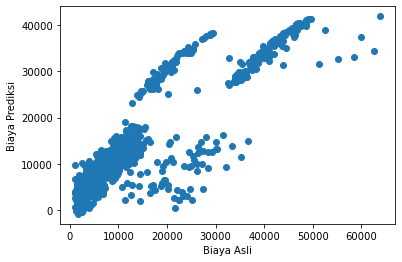

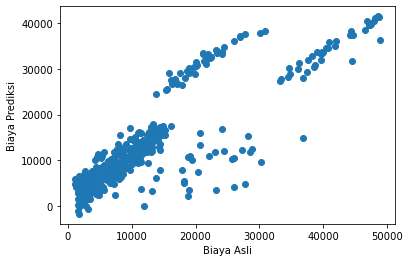

In [121]:
import matplotlib.pyplot as plt

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

# Plot hasil regresi
plt.scatter(y_train, y_train_pred)
plt.xlabel("Biaya Asli")
plt.ylabel("Biaya Prediksi")
plt.show()

y_test_pred = model.predict(x_test)
# Plot hasil regresi
plt.scatter(y_test, y_test_pred)
plt.xlabel("Biaya Asli")
plt.ylabel("Biaya Prediksi")
plt.show()

##### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [53]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y_test
y_pred = model.predict(x_test)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 3959.916767655888
MSE: 32184469.020035688
RMSE: 5673.135730796125
R-squared: 0.7931439144729051
